### Name:
Sajith Gowthaman

Certified Data Scientist - Engineering Management Graduate - Mechanical Engineering Graduate.

sajithgowthaman@gmail.com

![fd6d9082-1280-40ea-95c0-35ef13ad593f_200x200](https://user-images.githubusercontent.com/55968160/83734680-2d669900-a604-11ea-8612-6762640248d3.png)


### Course:
Data Science Immersion

### Project Name:
Predicting Car Price from [cars.com](cars.com).


<img src="https://mma.prnewswire.com/media/429255/Carscom_Logo.jpg?p=publish" width="400" height="300" />


#### Information:
This project will be used to predict the price of used cars located in California. The data is scraped from [cars.com](cars.com) who are the leading digital marketpace in the automobile industry for purchasing/selling cars. As we know, one of the most challenging part of purchasing a vehicle is to know the value of the vehicle especially you would want to answer to the question "Am I paying the right amount?". Through this project, you will be able to analyze the current market trends in the automobile industry through dynamic visualizations with the help of Seaborn plots and after that, the machine learning part of the project comes into action in providing you with accurate predictions of car prices, given certain features such as mileage, brand, color, tax, condition, ratings, transmission and drive. 

The Data is scraped using libraries such as requests, BeauitfulSoup and json. The url for each car differs completely, so I had to scrape them one at a time for each brand. The dataset which is scraped consists of 100,000+ observation and 28 features. Not to mislead you, these features are after One-Hot Encoding. After doing my own research, I was able to find what actaully impacts the price of a vehicle. I was able to apply that to this project by adding them as features towards the end. 
(I did this project out of interest and I am also in search of finding the right car for myself in Bay Area! :D )



#### Workflow/Pipeline
- Imports
- Web Scraping & Cleaning
- Data Mining & Wrangling
- Feature Engineering & Data Cleaning
- Visualization using Seaborn
- Normality
- Collinearity
- Correlation
- Bi-Variate Analysis
- Linearity
- Log transformation and Box-Cox, validation using Jarque Bera and SciPy's built in Normality test
- Data extraction from external source (Tax information)
- Model Building
- Linear Regression
- Polynomial induced linear regression
- Making Predictions
- Understanding the Model Fit
- Evaluation
- Conclusion

In [1]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from time import time
from warnings import warn
from bs4 import BeautifulSoup
import requests
import json
import re
from urllib.request import urlopen

#Importing Regression Modules
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

We will begin scraping our data. For the sole purpose of machine learning, we will get rid of dirty elements attachted to the observation while extracting. That way it would simplify the model building process.

In [2]:
#Defining a function that extracts important features from cars.com
def scrape(urls):
    entries = []
    for i in range(1,50):
        response = requests.get(urls.format(i))
        if (response.ok):
            data = response.text
            soup = BeautifulSoup(data, 'html.parser')
            names = soup.select('.shop-srp-listings__listing-container')
            for name in names:
                price = name.select_one('.listing-row__price ').text.replace('\n','').replace(' ','').replace('$','').replace(',','')
                title = name.select_one('.listing-row__title').text.replace('\n','').replace('  ','')
                ratings = soup.find("span", {'class':'listing-row__review-number'}).find_previous_sibling(text=True).replace(' ','').replace('\n','')
                miles = name.select_one('.listing-row__mileage').text.replace('\n','').replace(' ','').replace('mi.','').replace(',','')
                transmission = soup.find('strong', text='Transmission:').find_next_sibling(text=True).replace('\n', '').replace(' ','')
                drive = soup.find('strong', text='Drivetrain:').find_next_sibling(text=True).replace('\n', '').replace(' ','')
                color = soup.find('strong', text='Ext. Color:').find_next_sibling(text=True).replace('\n', '').replace(' ','')
                items = {
                              'price': price,
                              'ratings': ratings,
                              'miles': miles,
                              'transmission': transmission,
                              'name': title,
                              'drive': drive,
                              'color': color
                      }
                entries.append(items)
                dataframe = pd.DataFrame(entries)
                dataframe['brand'] = dataframe.name.str.split().str[1]
                dataframe['year'] = dataframe.name.str.split().str[0]
                dataframe.drop(columns=['name'], inplace=True, axis=1)
    return dataframe

In [ ]:
#Scraping the top 20 common brands in the California

#Ford
df_ford = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20015&page=1&perPage=100&rd=500&searchSource=GN_REFINEMENT&sort=relevance&stkTypId=28881&zc=94544')
df_ford['ford'] = 1
df_ford.head()

#Honda
df_honda = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20017&page=1&perPage=100&rd=500&searchSource=GN_REFINEMENT&sort=relevance&stkTypId=28881&zc=94544')
df_honda['honda'] = 1
df_honda.head()

#Toyota
df_toyota = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20088&page=50&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_toyota['toyota'] = 1
df_toyota.head()

#Chevrolet
df_chevrolet = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20053&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_chevrolet['chevrolet'] = 1
df_chevrolet.head()

#Nissan
df_nissan = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20077&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_nissan['nissan'] = 1
df_nissan.head()

#Dodge
df_dodge = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20012&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_dodge['dodge'] = 1
df_dodge.head()

#Mazda
df_mazda = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20073&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_mazda['mazda'] = 1

#Hyundai
df_hyundai = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20064&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_hyundai['hyundai'] = 1

#BMW
df_bmw = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20005&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_bmw['bmw'] = 1

#Audi
df_audi = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20049&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_audi['audi'] = 1

#Volkswagon
df_vw = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20089&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_vw['vw'] = 1

#Tesla
df_tesla = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=28263&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_tesla['tesla'] = 1

#Benz
df_benz = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20028&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_benz['benz'] = 1

#Acura
df_acura = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20001&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_acura['acura'] = 1

#Kia
df_kia = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20068&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_kia['kia'] = 1

#Buick
df_buick = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20006&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_buick['buick'] = 1

#FIAT
df_fiat = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20060&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_fiat['fiat'] = 1

#Volvo
df_volvo = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20044&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_volvo['volvo'] = 1

#Mitsubishi
df_mit = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20030&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_mit['mit'] = 1

#Jeep
df_jeep = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20021&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_jeep['jeep'] = 1

#GMC
df_gmc = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20061&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_gmc['gmc'] = 1

#Infinity
df_inf = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20019&page=1&perPage=100&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=94544')
df_inf['inf'] = 1

#Lexus
df_lex = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20070&page=1&perPage=100&rd=500&searchSource=GN_REFINEMENT&sort=relevance&stkTypId=28881&zc=94544')
df_lex['lex'] = 1

#Porsche
df_por = scrape('https://www.cars.com/for-sale/searchresults.action/?mkId=20081&page=1&perPage=100&rd=500&searchSource=GN_REFINEMENT&sort=relevance&stkTypId=28881&zc=94544')
df_por['por'] = 1

<img width="494" alt="Screen Shot 2020-06-02 at 5 02 08 PM" src="https://user-images.githubusercontent.com/55968160/83736134-12952400-a606-11ea-859a-c05f20a8d0cc.png">

Let's create a dataframe containing all the scraped information and pickle them to store in our local drive. 

In [ ]:
#Creating the dataframe
frames = [df_ford, df_toyota, df_honda, df_chevrolet, 
          df_dodge, df_nissan, df_mazda, df_hyundai, 
          df_bmw, df_audi, df_vw, df_tesla, df_benz, df_acura, 
          df_kia, df_buick, df_fiat, df_volvo, df_mit, df_jeep, 
          df_gmc, df_inf, df_lex, df_por]
df = pd.concat(frames, ignore_index=True)
df = df[['year','brand','price','ratings','miles','color','drive',
         'transmission','ford','toyota','honda','chevrolet','dodge',
         'nissan','mazda', 'hyundai', 'bmw', 'audi', 'vw', 'tesla', 
         'benz', 'acura', 'kia', 'buick', 'fiat', 'volvo', 'mit',
         'jeep', 'gmc', 'inf', 'lex','por']]
df.head()

In [3]:
df = pd.read_pickle('cars_webscrape')

#### Data Cleaning and Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111279 entries, 0 to 111278
Data columns (total 32 columns):
year            111279 non-null object
brand           111279 non-null object
price           111279 non-null object
ratings         111279 non-null object
miles           111279 non-null object
color           111279 non-null object
drive           111279 non-null object
transmission    111279 non-null object
ford            4900 non-null float64
toyota          4900 non-null float64
honda           4900 non-null float64
chevrolet       4459 non-null float64
dodge           4851 non-null float64
nissan          4704 non-null float64
mazda           4851 non-null float64
hyundai         4900 non-null float64
bmw             4802 non-null float64
audi            4165 non-null float64
vw              4802 non-null float64
tesla           3430 non-null float64
benz            4900 non-null float64
acura           4655 non-null float64
kia             3577 non-null float64
buick  

Most of our features were engineered while scraping itself. However, for Machine Learning purpose it is important that we clean our data in an acceptable manner that would produce accurate real results and not some made up values. How are we going to go about it? Let's fill the missing values in quantitative and qualitative approach. Let's assign 0's and 1's for binary variables that, use get_dummies for colors and brands. 

In [5]:
#Filling Nan and Missing Values
'''Lets take the qualitative approach for categorical values
   and apply quantitative approach for continuous values'''
    
#Fill 'NaN's' with 0 and 'NotPriced' to mean value. 
df = df.fillna('0')
df.price = df.price.replace('NotPriced', np.nan)
items = ['ratings','miles','ford','toyota','honda','chevrolet', 
         'dodge', 'nissan', 'mazda', 'hyundai', 'bmw', 'audi', 
         'vw', 'tesla', 'benz', 'acura', 'kia', 'buick', 'fiat', 
         'volvo', 'mit', 'jeep','gmc', 'inf', 'lex','por']
for i, col in enumerate (items):
    df[col] = df[col].astype(float)

df.price = df.price.replace('NotPriced', np.nan)
df.price = df.price.astype(float)
df.price = df.price.fillna(df.price.mean())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111279 entries, 0 to 111278
Data columns (total 32 columns):
year            111279 non-null object
brand           111279 non-null object
price           111279 non-null float64
ratings         111279 non-null float64
miles           111279 non-null float64
color           111279 non-null object
drive           111279 non-null object
transmission    111279 non-null object
ford            111279 non-null float64
toyota          111279 non-null float64
honda           111279 non-null float64
chevrolet       111279 non-null float64
dodge           111279 non-null float64
nissan          111279 non-null float64
mazda           111279 non-null float64
hyundai         111279 non-null float64
bmw             111279 non-null float64
audi            111279 non-null float64
vw              111279 non-null float64
tesla           111279 non-null float64
benz            111279 non-null float64
acura           111279 non-null float64
kia           

#### Data Visualization

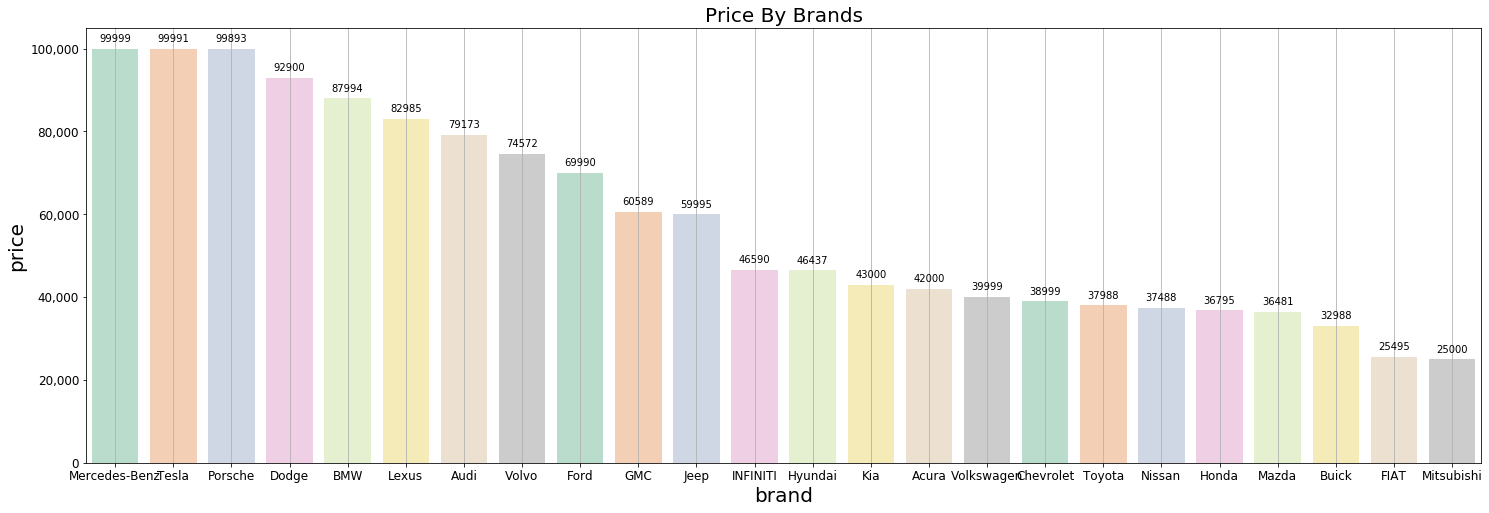

In [7]:
#Barplot for Price by brands
#Grouping statewise for current positive cases
df = df[df.price < 100000]
df_vis = df.copy()
df_vis.year = pd.to_datetime(df_vis['year'], format='%Y')
df_count = df_vis.groupby(by=['brand'])['price'].max().reset_index()
df_count.sort_values('price', ascending=False, inplace=True)
df_count = pd.DataFrame(df_count)
df_count

f, ax = plt.subplots(figsize=(25, 8))
splot = sns.barplot(df_count.brand, 
                    y=df_count.price, 
            label="Price By Brands",  ax=ax, 
           palette="Pastel2",
           )
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.grid(axis='x')
ax.set_title("Price By Brands", loc='center', fontsize=20)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

Well Class apart always. Mercedes Benz on top of the charts with over $100k followed by Tesla. Tesla ofcourse is revolutionazing the whole automobile industry with it's cutting edge techonology. California's most commonly used cars were ford, honda, dodge, toyota. 

In [8]:
df_count.head()

,brand,price
16,Mercedes-Benz,99999.0
20,Tesla,99991.0
19,Porsche,99893.0
5,Dodge,92900.0
2,BMW,87994.0


In [9]:
df.head()

,year,brand,price,ratings,miles,color,drive,transmission,ford,toyota,...,kia,buick,fiat,volvo,mit,jeep,gmc,inf,lex,por
0,2005,Ford,5988.0,4.7,84924.0,Silver,RWD,Automatic,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,Ford,11999.0,4.7,39735.0,Silver,RWD,Automatic,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,Ford,32988.0,4.7,31726.0,Silver,RWD,Automatic,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,Ford,15590.0,4.7,25239.0,Silver,RWD,Automatic,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,Ford,14282.0,4.7,66419.0,Silver,RWD,Automatic,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


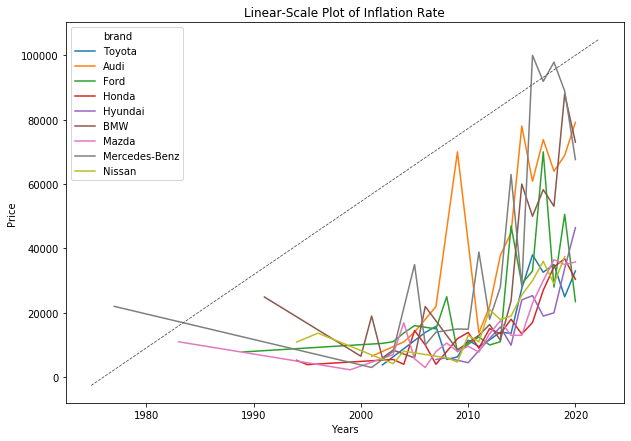

In [10]:
#Grouping year wise price for cars
df_vis = df.loc[df['brand'].isin(['Honda', 'Ford', 'Toyota','Hyundai',
                                  'Mercedes-Benz', 'Nissan', 'Mazda', 'BMW','Audi'])]
df_vis.year = pd.to_datetime(df_vis['year'], format='%Y')
df_count = df_vis.groupby(by=['brand','year'])['price'].max().reset_index()
df_count.sort_values('year', ascending=False, inplace=True)
df_count = pd.DataFrame(df_count)

# linear-scale plot of inflation rate
plt.figure(figsize=(10,7))

ax = sns.lineplot(
    x="year",
    y="price",
    hue="brand",
    data=df_count,
)

ax.set(
    xlabel="Years",
    ylabel="Price",
    title="Linear-Scale Plot of Inflation Rate"
)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", lw=.8)
plt.show()

We can see the fall in the car prices in 2020. We all know the reason why. This would be the perfect time for you to buy used cars if you ever have plans on buying! 

* Price of Mercedez Benz is falling down.
* Audi is Increasing
* All the common brands are still in the same price range.

It is important to note the constant stability in the prices of commonly used cars in CA like toyota, honda, chevrolet, mitsubishi, etc are still stable even through this recession.

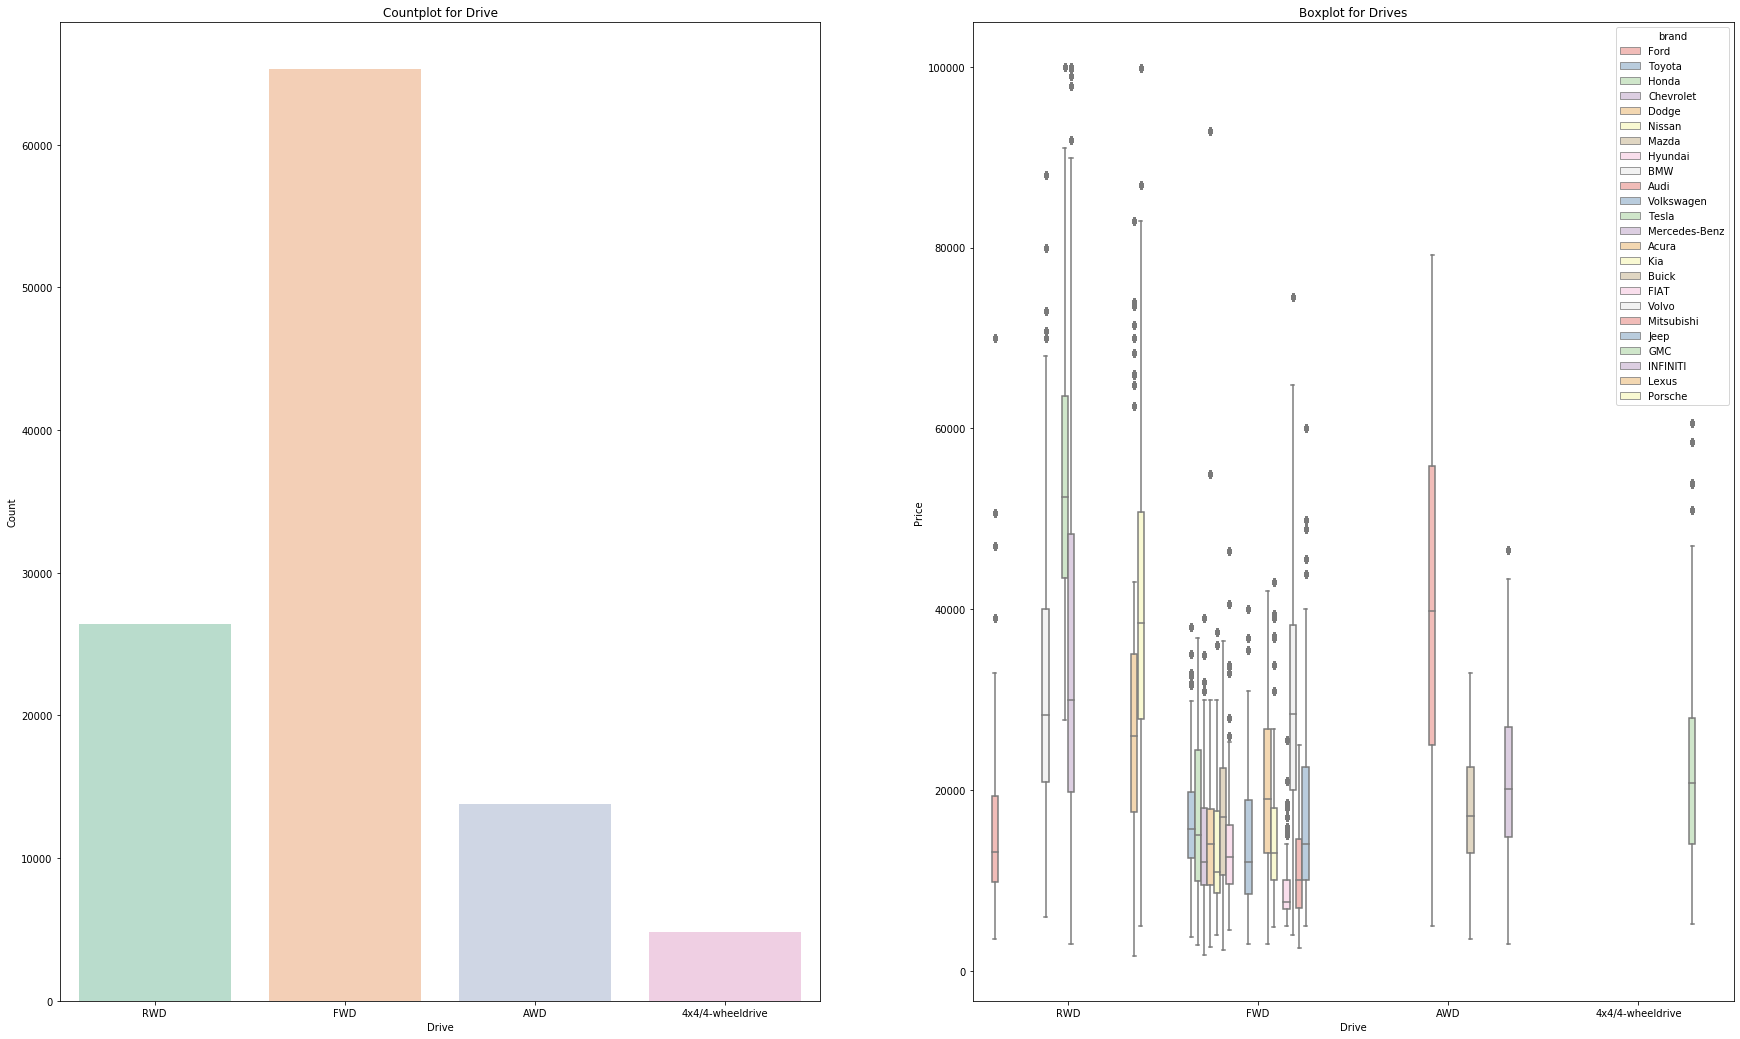

In [11]:
#Drive and Transmission
fig, axes = plt.subplots(1,2, figsize=(30,18))

ax=axes[1]
ax1 = sns.boxplot(x=df.drive, y=df.price, palette='Pastel1', hue=df.brand, ax=axes[1])
ax1.set(
    xlabel="Drive",
    ylabel="Price",
    title="Boxplot for Drives")

ax=axes[0]
ax2 = sns.countplot(df.drive, palette='Pastel2', ax=axes[0])
ax2.set(
    xlabel="Drive",
    ylabel="Count",
    title="Countplot for Drive")
plt.show()

There are three kinds of AWD, FWD, RWD. 4x4 is similar to AWD with just a better traction control over it. It is commonly seen in trucks and pick up vehicles. Well it is interesting to see that the most preferred or used drive is Front Wheel Drive which means it is mostly a sedan/hatchback. Most All wheel drives are SUV's.

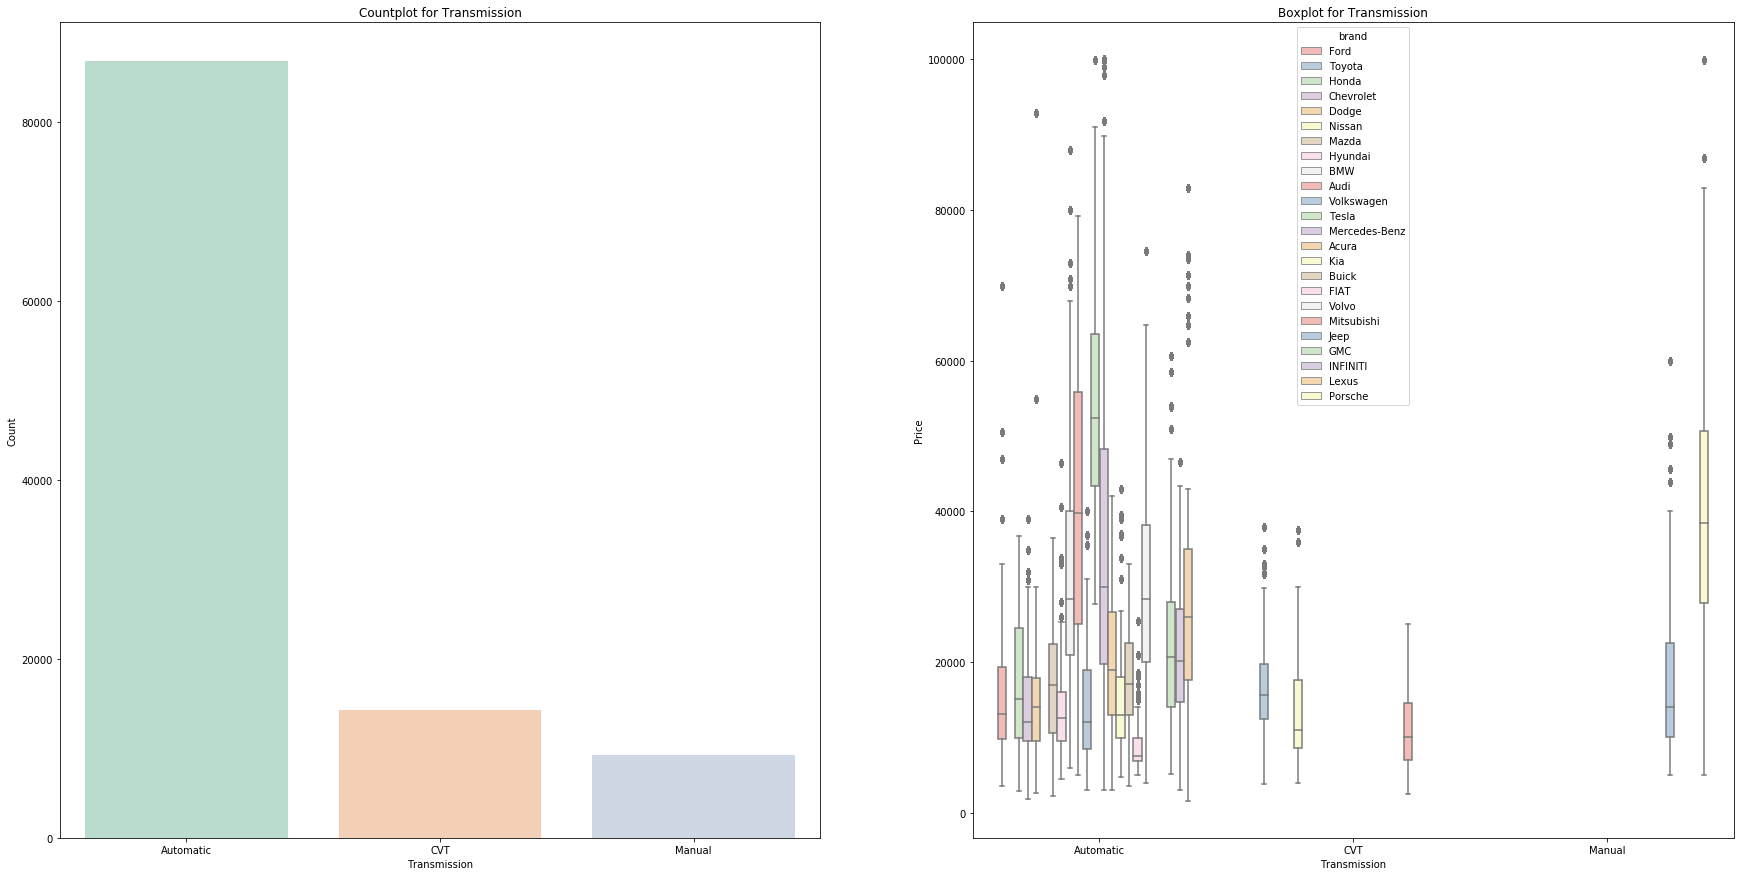

In [12]:
#Drive and Transmission
fig, axes = plt.subplots(1,2, figsize=(30,15))

ax=axes[0]
ax2 = sns.countplot(df.transmission, palette='Pastel2', ax=axes[0])
ax2.set(
    xlabel="Transmission",
    ylabel="Count",
    title="Countplot for Transmission")

ax=axes[1]
ax1 = sns.boxplot(x=df.transmission, y=df.price, palette='Pastel1', hue=df.brand, ax=axes[1])
ax1.set(
    xlabel="Transmission",
    ylabel="Price",
    title="Boxplot for Transmission")
plt.show()

* Automatic is preferred by most of them (~90%).
* CVT and manual both contribute about 5% each

There are few Continuously Variable Transmission that is also automatic but it leverages the gear ratio to produce the most efficient speed and mileage. Manual, ofcourse is modetly driven by automoboile enthusiasts these days.

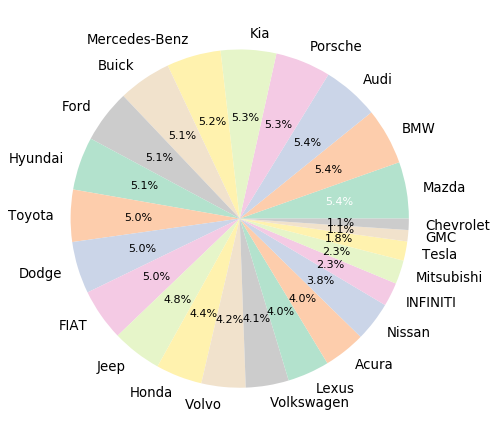

In [13]:
#Subsetting data
vis_df = df.copy()
count_df = vis_df.groupby(by=['brand'])['ratings'].max().reset_index()
count_df.sort_values('ratings', ascending=False, inplace=True)
count_df = pd.DataFrame(count_df)

#Pie chart for brandwise ratings
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
patches, texts, autotexts = ax.pie(x=count_df.ratings, labels=count_df.brand, 
       autopct='%1.1f%%',
      colors=sns.color_palette("Pastel2"))

plt.setp(texts, size=12)
plt.setp(autotexts, size='medium')
plt.setp(texts[-1], size='large')
autotexts[0].set_color('white')

plt.show()

Audi, BMW, and Mazda are the highest rated on average. Mazda having such a high rating is largely due to the options that are provided with less cost. Chevrolet having a bad rating with Tesla, this could be due the service fee. 

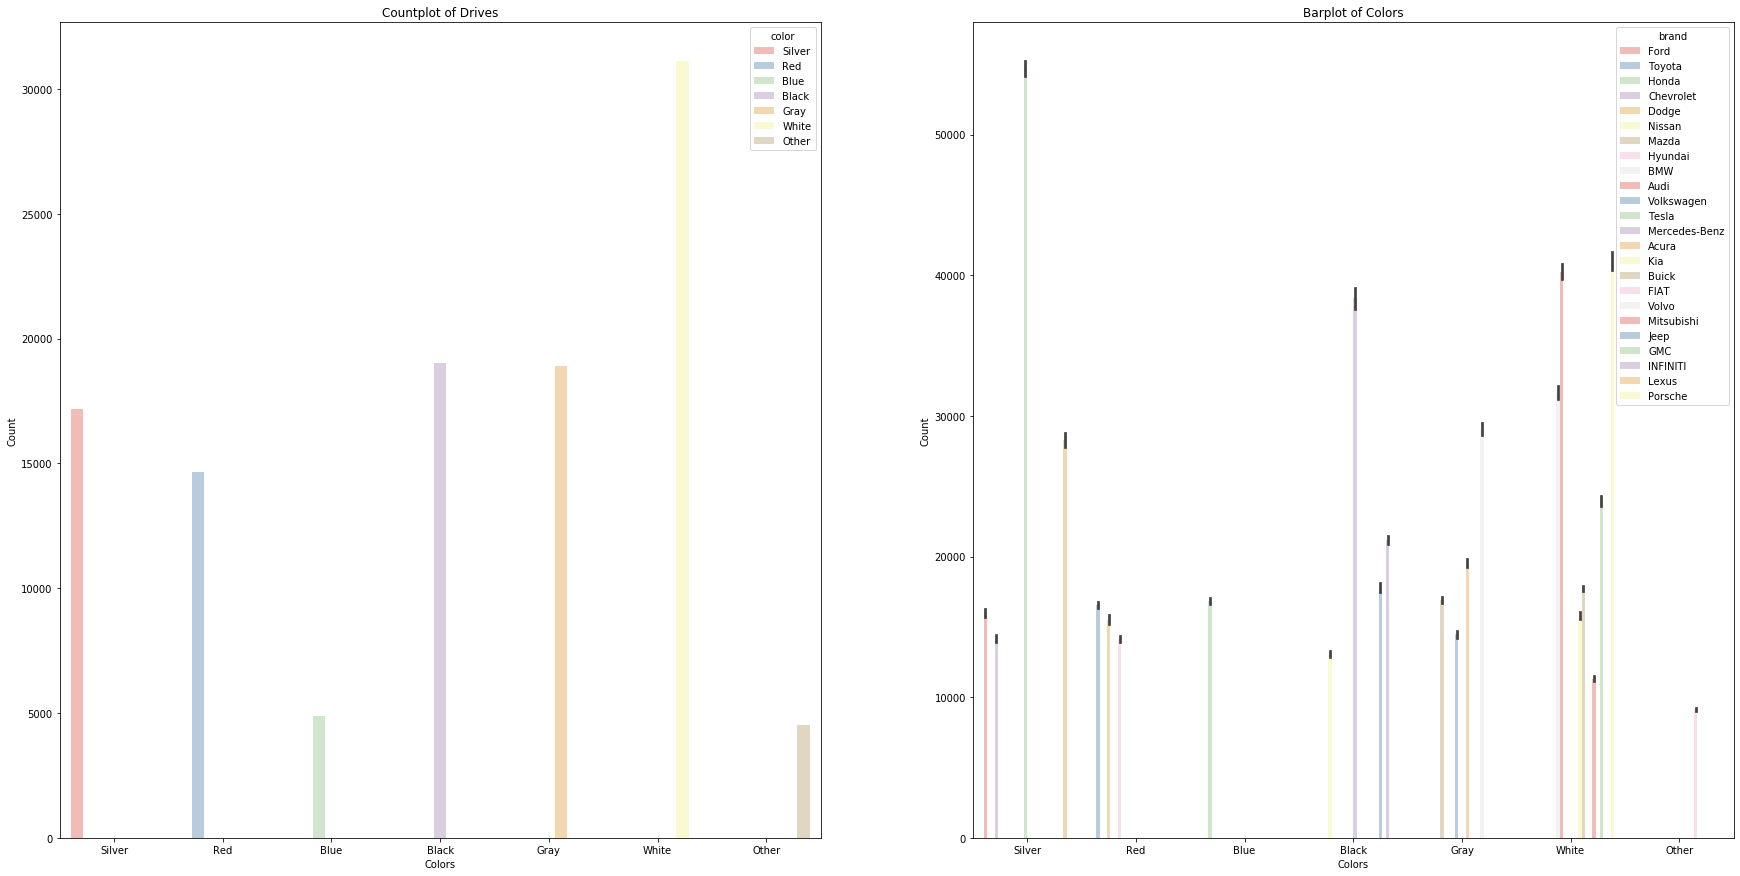

In [14]:
#Countplot for Colors 3610
fig, axes = plt.subplots(1,2, figsize=(30,15))
ax=axes[1]
ax = sns.barplot(x=df.color, y=df.price, hue=df.brand, palette='Pastel1', ax=axes[1])
ax.set(
    xlabel="Colors",
    ylabel="Count",
    title="Barplot of Colors")

ax=axes[0]
ax = sns.countplot(df.color, hue=df.color, palette='Pastel1', ax=axes[0])
ax.set(
    xlabel="Colors",
    ylabel="Count",
    title="Countplot of Drives")
plt.show()

Black and white colors were commonly used, followed by gray silver and red. For all you know, colors play a huge role in production. The car might have all the accessories but the customer would still not be satisfied without their preferred color. So if you were to start an automobile dealership store i would suggest investing on the most favorable colors than the other ones.

price    1.000000
tesla    0.359342
por      0.239789
audi     0.225989
benz     0.212522
bmw      0.129484
volvo    0.094695
Name: price, dtype: float64


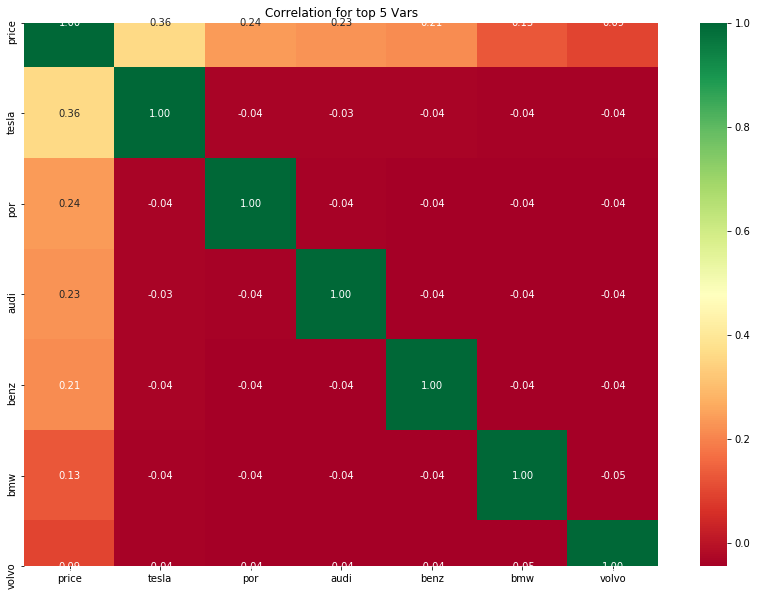

In [15]:
#Correlation Heatmap
#Getting the top 5 most correlated variables with rating.
target = 'price'
no_cols = 7
corrmat = df.corr()
print (corrmat.nlargest(no_cols, target)[target])

cols = corrmat.nlargest(no_cols, target)[target].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(15,10))
ax = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', cmap='RdYlGn', yticklabels=cols.values, xticklabels=cols.values)
ax.set(
    title="Correlation for top 5 Vars")
plt.show()

We have relatively weak correlation with each variable. Weak correlations CAN be statistically significant with large data. In our case, we do have a decent amount of data points. Again back to data cleaning to convert the categorical columns to numerical by one hot encoding.

In [16]:
#One-Hot Encoding
'''Since features that require encoding are nominal, we can map 0's and 1's to
   binary variables and assign reasonable weights for drive and transmission. 
   Get dummies from using Pandas for color of the vehicle'''

df.drive = df.drive.replace('FWD',0).replace('RWD',1).replace('AWD',2).replace('4x4/4-wheeldrive',3)
df.transmission = df.transmission.replace('Automatic',2).replace('CVT',1).replace('Manual',0)
df.transmission = df.transmission.astype(float)
df.year = df.year.astype(float)
df = pd.concat([df,pd.get_dummies(df.year, prefix = 'year')], axis=1)
df = pd.concat([df,pd.get_dummies(df.color, prefix = 'Color')], axis=1)
df.drop(columns=['color'], inplace = True)
df.head()

,year,brand,price,ratings,miles,drive,transmission,ford,toyota,honda,...,year_2018.0,year_2019.0,year_2020.0,Color_Black,Color_Blue,Color_Gray,Color_Other,Color_Red,Color_Silver,Color_White
0,2005.0,Ford,5988.0,4.7,84924.0,1,2.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2017.0,Ford,11999.0,4.7,39735.0,1,2.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2016.0,Ford,32988.0,4.7,31726.0,1,2.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,2018.0,Ford,15590.0,4.7,25239.0,1,2.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
4,2016.0,Ford,14282.0,4.7,66419.0,1,2.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


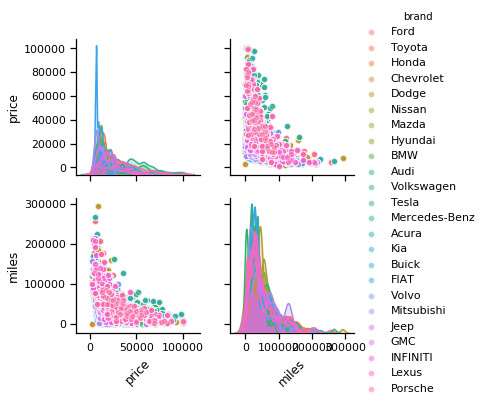

In [17]:
#Correlations
with sns.plotting_context('notebook', font_scale=1):
    g = sns.pairplot(df, 
                 plot_kws={'alpha':0.5, },
                 vars=['price','miles'],
                 hue='brand', 
                markers= 'o',
                )
   
    for ax in g.axes.flat: 
        ax.set_xlabel(ax.get_xlabel(), rotation=45)
plt.show()

We can see that as the price increases the milage driven is considerably decreasing. 

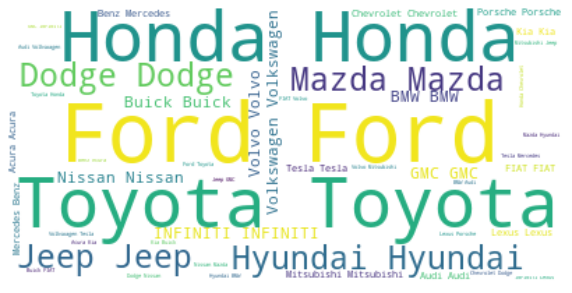

In [18]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(" ".join(df["brand"]))
plt.figure(figsize=(10,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

Ford, Honda, Toyota, Hyundai and Dodge are the most commonly found used cars around CA. 

After doing a research, I can tell that the major factors that impact car price are the mileage, year, color, location (we can assume it is the vehicle (service) tax).
The Vehicle tax for the years have been taken from year 1977 to 2020 from [cdtfa.ca.gov](https://www.cdtfa.ca.gov/taxes-and-fees/sales-use-tax-rates-history.htm). 
The condition of the car is also essential apparently. So, we will map it in such a way that cars with less than 35,000 miles are. considered excellent condition, while more than that as decent. We will use Pandas libraries to get dummies later for the same variable.

In [19]:
#Condition of the vehicle
df['condition'] = np.where(df.miles > 35000, 1, 0)

#Mapping the Tax-rates to the respective years
def tax(data):
    if data.year == 1970:
        return 5
    if data.year == 1972:
        return 5
    if data.year == 1977:
        return 6
    if data.year == 1980:
        return 6
    if data.year == 1981:
        return 6
    if data.year == 1983:
        return 6
    if data.year == 1984:
        return 6
    if data.year == 1988:
        return 6
    if data.year == 1991:
        return 6
    if data.year == 1989:
        return 6.25
    if data.year == 1991:
        return 7.25
    if data.year == 1992:
        return 7.25
    if data.year == 1994:
        return 7.25
    if data.year == 1995:
        return 7.25
    if data.year == 1996:
        return 7.25
    if data.year == 1997:
        return 7.25
    if data.year == 1998:
        return 7.25
    if data.year == 1999:
        return 7.25
    if data.year == 2000:
        return 7.25
    if data.year == 2002:
        return 7.25
    if data.year == 2003:
        return 7.25
    if data.year == 2004:
        return 7.25
    if data.year == 2005:
        return 7.25
    if data.year == 2006:
        return 7.25
    if data.year == 2007:
        return 7.25
    if data.year == 2008:
        return 7.25
    if data.year == 2012:
        return 7.25
    if data.year == 2017:
        return 7.25
    if data.year == 2018:
        return 7.25
    if data.year == 2019:
        return 7.25
    if data.year == 2020:
        return 7.25
    if data.year == 2009:
        return 8.25
    if data.year == 2010:
        return 8.25
    if data.year == 2011:
        return 8.25
    if data.year == 2001:
        return 7.0
    if data.year == 2013:
        return 7.50
    if data.year == 2014:
        return 7.50
    if data.year == 2015:
        return 7.50
    if data.year == 2016:
        return 7.50
df['tax_rate']= df.apply (lambda data: tax(data), axis=1)
df.tax_rate = df.tax_rate/100

Let's do a regplot to find how the data points are scattered from the linear plane.

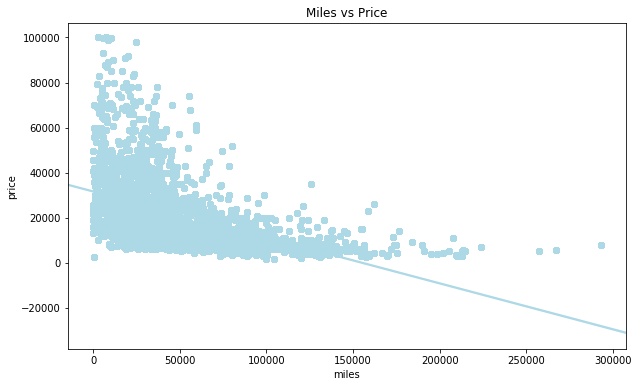

In [20]:
#Regplot
plt.figure(figsize=(10,6))
sns.regplot(x='miles', y='price', data=df, color='lightblue').set_title('Miles vs Price')
plt.show()

In order to get a precise model, let's eliminate the outliers. That way, we could get a better model and out outlier wouldn't alter the results.

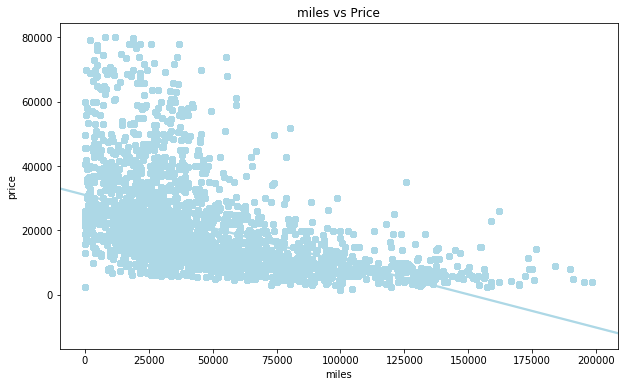

In [21]:
df = df[df.miles < 200000]
df = df[df.price < 80000]

plt.figure(figsize=(10,6))
sns.regplot(x='miles', y='price', data=df, color='lightblue').set_title('miles vs Price')
plt.show()

We were able to close down our data points such that there were not many outliers. 

Three ways to deal with skewed data: 
* log transformation
* SciPy's boxcox transformation
* Mean square root
* SciPy's Yeo Johnson method

**Note that Box-Cox, log, and square root transformations only work when all datapoints are positive.**

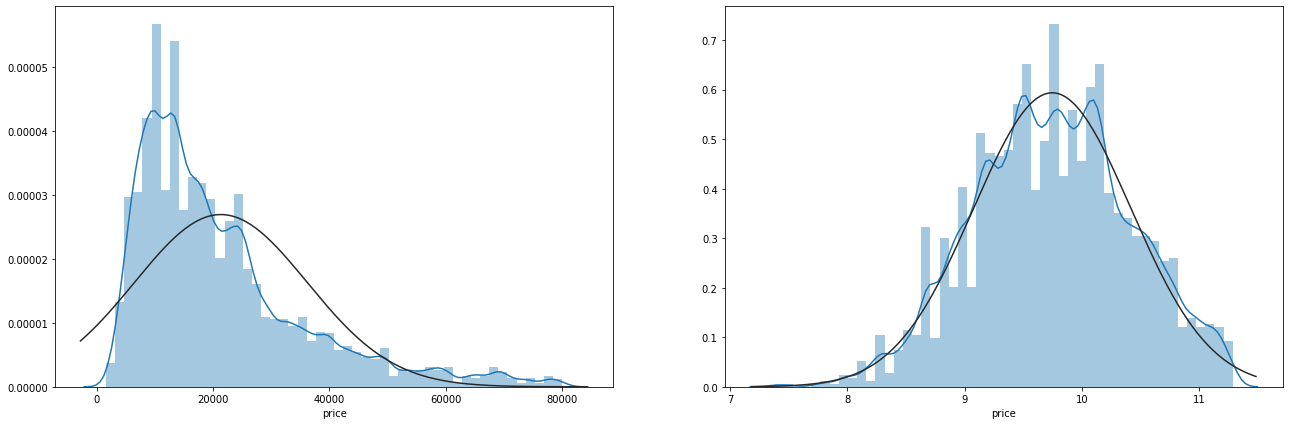

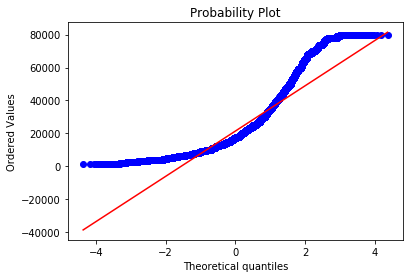

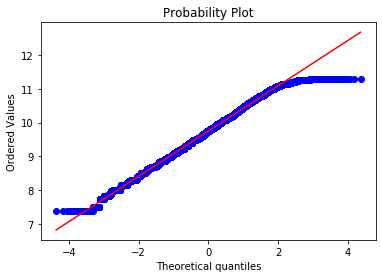

In [22]:
from scipy import stats
from scipy.stats import norm
fig, axes = plt.subplots(1,2, figsize=(22,7))
ax=axes[0]
ax = sns.distplot(df['price'], fit=norm, ax=axes[0])
fig = plt.figure()
pp = stats.probplot(df['price'], plot=plt)

ax=axes[1]
df['price'] = np.log(df['price'])
ax = sns.distplot(df['price'], fit=norm, ax=axes[1])
fig = plt.figure()
pp = stats.probplot(df['price'], plot=plt)

In [23]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(np.log(df['price']))
norm_stats = normaltest(np.log(df['price']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1155.0204942741689 and p value is 0.0
Normality test statistics is 1141.944534769617 and p value is 1.0712601627667072e-248


The p value in the Normality test is > 5. We can tell that it is statistically normal.  

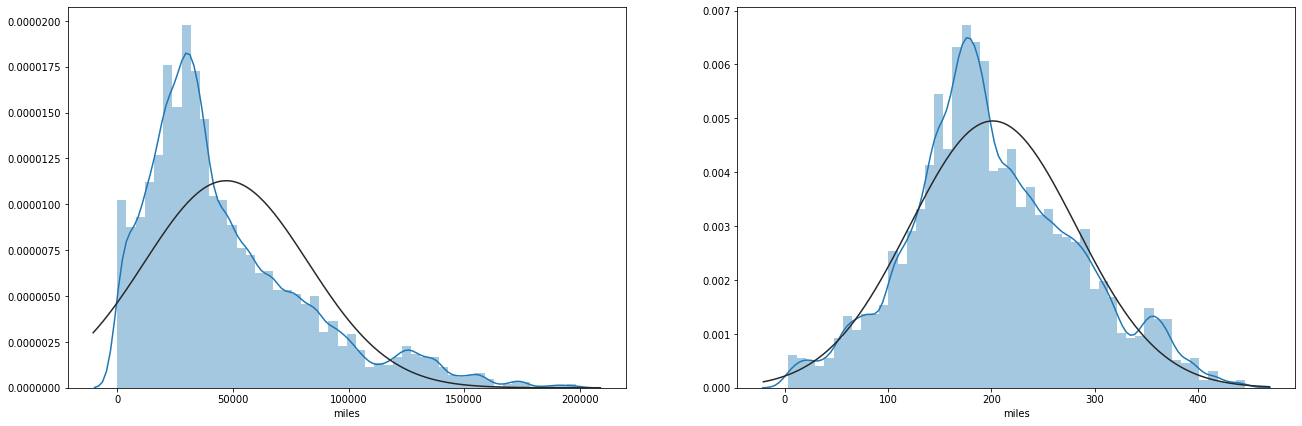

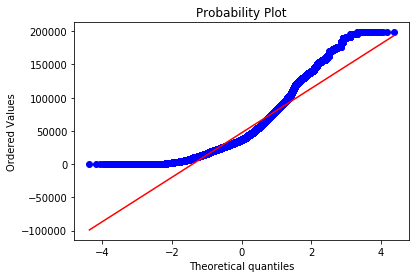

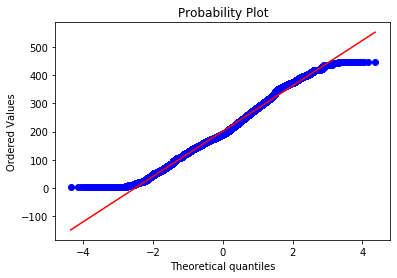

In [24]:
#Normalizing Miles
from sklearn.preprocessing import normalize
fig, axes = plt.subplots(1,2, figsize=(22,7))
ax=axes[0]
ax = sns.distplot(df['miles'], fit=norm, ax=axes[0])
fig = plt.figure()
pp = stats.probplot(df['miles'], plot=plt)

ax=axes[1]
df['miles'] = np.sqrt(df["miles"])
ax = sns.distplot(df['miles'], fit=norm, ax=axes[1])
fig = plt.figure()
pp = stats.probplot(df['miles'], plot=plt)

Might not be completely normal but it is good to go as long as it has a tail to its left and right. Which is still anyday better than a skewed data which would provide us inaacurate false results.

In [25]:
#Converting to Floats
items  = ['year_1980.0', 'year_1981.0', 'year_1983.0', 'year_1989.0',
          'year_1972.0', 'year_1977.0', 'drive','year_1995.0', 'year_1996.0', 
          'year_1998.0', 'year_1999.0','year_2000.0', 'year_2001.0', 
          'year_2002.0', 'year_2003.0','year_2004.0', 'year_2005.0', 
          'year_2006.0', 'year_2007.0','year_2008.0', 'year_2009.0', 
          'year_2010.0', 'year_2011.0','year_2012.0', 'year_2013.0',
          'year_1970.0', 'year_1991.0', 'year_1992.0', 'year_1994.0',
          'year_2014.0', 'year_2015.0', 'year_1984.0', 'year_1988.0',
          'year_2016.0', 'year_2017.0', 'year_2018.0', 'year_2019.0',
          'year_2020.0', 'Color_Black', 'Color_Blue', 'Color_Red', 'year_1997.0', 'condition',
          'Color_Silver','Color_White', 'Color_Gray', 'Color_Other']
for i, col in enumerate (items):
    df[col] = df[col].astype(float)
df.drop(columns=['brand'], axis=1, inplace=True)

#### Model Building

In [26]:
#Dependent and Independent Variable
X = df.drop(columns=['price','year'], axis=1)
Y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 150)

In [27]:
#Shapes
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (86984, 75)
X_test (21747, 75)
y_train (86984,)
y_test (21747,)


In [28]:
X_train.head()

,ratings,miles,drive,transmission,ford,toyota,honda,chevrolet,dodge,nissan,...,year_2020.0,Color_Black,Color_Blue,Color_Gray,Color_Other,Color_Red,Color_Silver,Color_White,condition,tax_rate
37084,4.7,217.292430,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0725
84782,2.1,190.827147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0750
3877,4.7,163.119588,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0725
44273,5.0,49.446941,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0725
75791,4.6,306.427806,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0750


In [29]:
# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     3884.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:09:59   Log-Likelihood:                -31264.
No. Observations:               86984   AIC:                         6.265e+04
Df Residuals:                   86921   BIC:                         6.324e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.5509      0.005    947.029      0.000       4.542       4.560
ratings          0.6295      0.001    698.566      0.000       0.628       0.631
miles           -0.0021      3e-05    -70.709      0.000      -0.002      -0.002
drive            0.3456      0.002    218.937      0.000       0.343       0.349
transmission     0.8650      0.002    441.473      0.000       0.861       0.869
ford            -1.3114      0.005   -281.551      0.000      -1.321      -1.302
toyota           0.8579      0.005    186.424      0.000       0.849       0.867
honda            0.3435      0.003    129.913      0.000       0.338       0.349
chevrolet        1.2099      0.005    261.410      0.000       1.201       1.219
dodge           -0.1510      0.005    -32.405      0.000      -0.160      -0.142
nissan           0.5024      0.005    103.024      0.000       0.493       0.512
mazda           -0.5332      0.005   -109.455      0.000      -0.543      -0.524
hyundai         -0.3038      0.005    -66.492      0.000      -0.313      -0.295
bmw             -0.5881      0.005   -112.632      0.000      -0.598      -0.578
audi            -0.7311      0.005   -135.951      0.000      -0.742      -0.721
vw               0.1067      0.005     21.483      0.000       0.097       0.116
tesla            1.6150      0.006    279.398      0.000       1.604       1.626
benz            -0.6854      0.005   -134.971      0.000      -0.695      -0.675
acura            0.4738      0.005     93.236      0.000       0.464       0.484
kia             -0.9101      0.005   -182.353      0.000      -0.920      -0.900
buick           -1.1998      0.005   -234.907      0.000      -1.210      -1.190
fiat            -0.1342      0.003    -48.740      0.000      -0.140      -0.129
volvo            0.5814      0.005    116.725      0.000       0.572       0.591
mit              1.6313      0.005    335.078      0.000       1.622       1.641
jeep             1.0186      0.004    230.020      0.000       1.010       1.027
gmc              1.0404      0.004    259.291      0.000       1.033       1.048
inf              0.3381      0.004     78.752      0.000       0.330       0.346
lex             -0.2240      0.005    -43.725      0.000      -0.234      -0.214
por              1.6041      0.004    377.789      0.000       1.596       1.612
year_1970.0      1.6244      0.054     30.052      0.000       1.518       1.730
year_1972.0     -0.3314      0.055     -6.071      0.000      -0.438      -0.224
year_1977.0      0.3288      0.053      6.232      0.000       0.225       0.432
year_1980.0      0.2689      0.054      4.983      0.000       0.163       0.375
year_1981.0      0.5622      0.055     10.288      0.000       0.455       0.669
year_1983.0      0.2143      0.054      3.970      0.000       0.109       0.320
year_

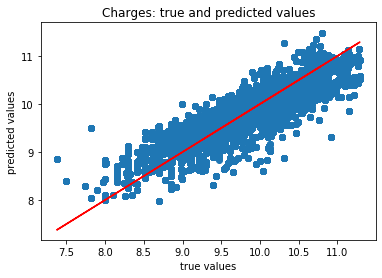

Mean absolute error of the prediction is: 0.27003147602438693
Mean squared error of the prediction is: 0.12190338920137761
Root mean squared error of the prediction is: 0.34914665858543975
Mean absolute percentage error of the prediction is: 2.7804781493128483


In [30]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

R-squared of the model in training set is: 0.7347977738604068
-----Test set statistics-----
R-squared of the model in test set is: 0.7274699808937404
Mean absolute error of the prediction is: 0.27003173441468226
Mean squared error of the prediction is: 0.12190335218614437
Root mean squared error of the prediction is: 0.34914660557729094
Mean absolute percentage error of the prediction is: 2.7804813345795614
-3786612390.5375614
Coefficients: 
 [-2.38367658e+04  9.47903369e+08 -2.12004232e-03  3.21926769e+08
 -2.83541435e+07 -1.69742438e+09 -1.37502146e+08 -1.37183386e+07
  2.13174485e+09 -1.09148003e+08  3.66075023e+08 -8.32817560e+08
 -2.03938340e+08 -9.25930583e+08 -1.24785735e+09  3.04666483e+08
  1.14628572e+09 -1.15977198e+09  3.99456821e+08 -5.09213478e+08
 -9.63486342e+08 -2.64314735e+08  2.09876147e+08  2.11656181e+09
 -5.15392153e+08  2.22182936e+09  1.07764035e+09 -7.49521015e+08
 -8.87848533e+08  8.97494559e+05  8.97492603e+05  8.88183627e+05
  8.88183567e+05  8.88183860e+05 

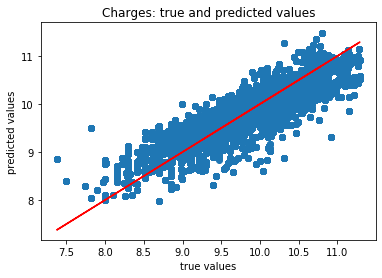

In [31]:
#Linear Regression
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

#Evaluate by checking coefficients and intercept
print(lrm.intercept_)
# The coefficients are relatively low 
print('Coefficients: \n', lrm.coef_)

# We are making predictions here
y_preds = lrm.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

The model with the lowest AIC or BIC value is preferred. However R-squared and RMSE values are good enough.

A linear model cannot be interpreted with just r-squared value. While R-Squared is used to determine the proportion of variance of the dependent variable (Price), RMSE plays a huge role. RMSE is used to measure the error rate of a regression model. 

MAE is similar to RMSE but comparatively smaller. Our Model is giving a good R-Squared value with a minimal amount of RMSE, which is also good.

R-squared for Train: 0.64
R-squared for Test: 0.63


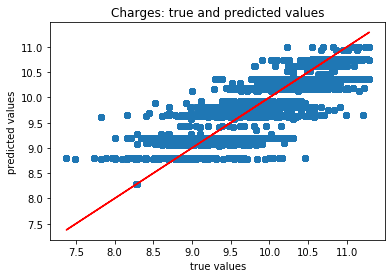

Mean absolute error of the prediction is: 0.31751297311302334
Mean squared error of the prediction is: 0.1643221085791665
Root mean squared error of the prediction is: 0.40536663476310736
Mean absolute percentage error of the prediction is: 3.288247254834086


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
params = {'n_estimators': 3, 'max_depth': 3, 'learning_rate': 1, 'criterion':'mse'}
gb_regressor = ensemble.GradientBoostingRegressor(**params)
gb_regressor.fit(X_train, y_train)

print ("R-squared for Train: %.2f" %gb_regressor.score(X_train, y_train))
print ("R-squared for Test: %.2f" %gb_regressor.score(X_test, y_test))

#GradientBoostRegressor Plot
y_preds = gb_regressor.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

The straight line in the linear model is unable to capture all the patterns of the data. This could be an under-fitting problem. Let's increase the complexity of the model by passing in quadratic and cubic curve (degree = 3).

**Degree = 2**


Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)


Addition of many polynomial features often leads to
overfitting, so we use polynomial features in combination
with regression that has a regularization penalty, like linear or ridge
regression.

(poly deg 2) linear model coeff (w):
[-2.33572163e+02 -1.97896947e+06 -6.01565969e+04 ... -1.57246806e+02
  8.10002090e+01  4.97771884e+01]
(poly deg 2) linear model intercept (b): 2042638.7958201256
(poly deg 2) R-squared score (training): 0.8348455607946216
(poly deg 2) R-squared score (test): 0.8288071429741334
Mean absolute error of the prediction is: 0.20944173442036704
Mean squared error of the prediction is: 0.07689519526042118
Root mean squared error of the prediction is: 0.27729982917488644
Mean absolute percentage error of the prediction is: 2.1431567689655635


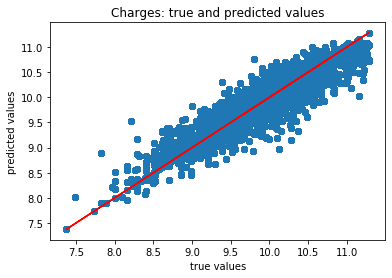

In [38]:
#Polynomial Linear Regression
from sklearn.preprocessing import PolynomialFeatures
print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


print('\nAddition of many polynomial features often leads to\n\
overfitting, so we use polynomial features in combination\n\
with regression that has a regularization penalty, like linear or ridge\n\
regression.\n')


X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, 
                                                              Y,
                                                              random_state = 450)


linreg = LinearRegression().fit(X_train_poly, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {}'
     .format(linreg.score(X_train_poly, y_train)))
print('(poly deg 2) R-squared score (test): {}'
     .format(linreg.score(X_test_poly, y_test)))

#Predictions and Scores
y_rmse_preds = linreg.predict(X_test_poly)
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_rmse_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_rmse_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_rmse_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_rmse_preds) / y_test)) * 100))

#Scatterplot of results
plt.scatter(y_test, y_rmse_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

Using Polynomial fit because of under fitting of the model. It takes higher order features to produce a quadratic curve. However, this is still a linear regression model. 

#### Results

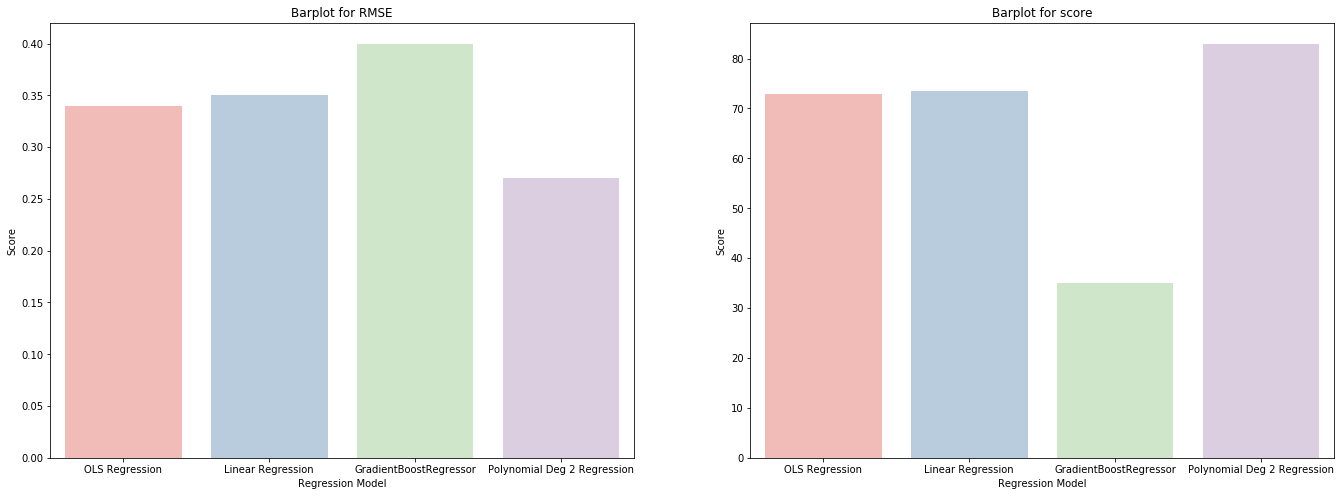

,Model,R-Square,RMSE
0,OLS Regression,73.0,0.34
1,Linear Regression,73.5,0.35
2,GradientBoostRegressor,35.0,0.40
3,Polynomial Deg 2 Regression,83.0,0.27


In [40]:
#Results
#Creating Df for Scores
scores = ['OLS Regression', 73, 0.34], ['Linear Regression', 73.5, 0.35] , ['GradientBoostRegressor', 35, 0.40] , ['Polynomial Deg 2 Regression', 83, 0.27]
df_scores = pd.DataFrame(scores, columns = ['Model','R-Square','RMSE'])
df_scores

fig, axes = plt.subplots(1,2, figsize=(23,8))

ax=axes[1]
ax1 = sns.barplot(x=df_scores.Model, y=df_scores['R-Square'], palette='Pastel1', ax=axes[1])
ax1.set(
    xlabel="Regression Model",
    ylabel="Score",
    title="Barplot for score")

ax=axes[0]
ax2 = sns.barplot(x=df_scores.Model, y=df_scores.RMSE, palette='Pastel1', ax=axes[0])
ax2.set(
    xlabel="Regression Model",
    ylabel="Score",
    title="Barplot for RMSE")
plt.show()

df_scores

#### Challenges Faced:
* Scraping the data was time consuming. However, after having scraped the data, it was pickled and store into local drive.
* Feature engineering and acquiring external data seemed hectic.
* Achieving a convincing model by trial and error method by working with the params.

#### General Summary
* From the visualizations, we can infer that now is a good time to purchase medium end cars such as ford, honda, dodge, hyundai, nissan and kia.
* 2019 had the highest car values for most of the vehicles. However, the car price in 2020 seems to be crashing due to the recession caused by the pandemic.
* The mean of miles driven in total considering all the brands is 48276 miles. Below that could be considered as a comparatively newer car.
* The mean car price is 22237 for a vehicle in California. Well, this is largely due to the extremely high prices of luxury vehicles.
* Except Chevrolet, all the brands had good ratings (above 4).  

#### Machine Learning Summary
* The data was scraped from cars.com with the most important features that helps us in predicting the price.
* The data was visualized using Seaborn plots by manipulating dataframes.
* Useful Features were extracted after indepth research for information such as tax rates and car conditions. 
* The Skewed plots were treated with Boxcox and by taking root of mean square root.


**Root mean squared error (RMSE) is minimized, R-squared value is increased**

$$ \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i-\hat{y}_i)^2}  $$

- **The model works better when fitted with Polynomial Features.**
- **The r-squared value was increased from 73% to 83%**
- **The RMSE value was decreased from 0.40 to 0.27**

                                             THANK YOU! 
